## Imports

In [4]:
import random
import itertools
import collections
from collections import Counter
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords

# Middle School Data
df_ms = pd.read_pickle("Middle_School/ms_df")
print(df_ms.info())

# Undergrad Data
df_ug = pd.read_pickle("Undergrad/ug_df")
print(df_ug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12998 entries, 0 to 12997
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    12998 non-null  object 
 1   minute       12998 non-null  float64
 2   seconds      12998 non-null  float64
 3   TotalSecond  12998 non-null  float64
 4   Speaker1     12997 non-null  object 
 5   Speaker      12997 non-null  object 
 6   Text         12995 non-null  object 
 7   group        12998 non-null  object 
dtypes: float64(3), object(5)
memory usage: 812.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11402 entries, 0 to 11401
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Speaker    11402 non-null  object
 1   Role       11402 non-null  object
 2   Utterance  11402 non-null  object
 3   group      11402 non-null  object
dtypes: object(4)
memory usage: 356.4+ KB
None


make new dataframes with only relevant columns

In [5]:
ms_df = df_ms[['Speaker', 'Text', 'group']]

ug_df = df_ug[['Speaker', 'Utterance', 'group']]

## Convert text to lowercase
Will convert text to lowercase so there is no issue with word comparisons.

In [6]:
for i,j in enumerate(ms_df['Text']):
    ms_df['Text'][i] = str(j).lower()

print(ms_df['Text'][0:10])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0                           to, um, to get all of the-
1    no, you have to do the project. then you save ...
2            we'll just read the instructions for now.
3    yeah, i did. number two. are [inaudible 00:02:...
4    the original one? the one we have on the scree...
5                             did you run the program?
6                                                  oh.
7             you have to remake all of the variables?
8    i don't think so. i don't know what to do. i d...
9    go back on the directions. yeah. so, we've ope...
Name: Text, dtype: object


Remove the text in [], which includes things like "[Student calls teacher to look at their assignment.]"

In [7]:
for i,j in enumerate(ms_df['Text']):
    ms_df['Text'][i] = re.sub("[\(\[].*?[\)\]]", '', str(j))

print(ms_df['Text'][0:10])

0                           to, um, to get all of the-
1    no, you have to do the project. then you save ...
2            we'll just read the instructions for now.
3                       yeah, i did. number two. are .
4    the original one? the one we have on the scree...
5                             did you run the program?
6                                                  oh.
7             you have to remake all of the variables?
8    i don't think so. i don't know what to do. i d...
9    go back on the directions. yeah. so, we've ope...
Name: Text, dtype: object


## Tokenize and Remove punctuation

In [8]:
for i, j in enumerate(ms_df['Text']):
    # print('j:', j)
    words = nltk.word_tokenize(str(j))
    ms_df['Text'][i] = [word for word in words if word.isalnum()]
    # print("after:",ms_df['Text'][i])

In [9]:
ms_df.to_pickle('Middle_School/before_stop_remove')

## Remove Stop Words

In [10]:
stopword = stopwords.words('english')
for i, j in enumerate(ms_df['Text']):
    # print(j)
    ms_df['Text'][i] = [word for word in j if word not in stopword]
    # print(ms_df['Text'][i])

Get dictionary of words in entire corpus

In [11]:
corpus_freq = {}
for i in ms_df['Text']:
    for word in i:
        if word in corpus_freq:
            corpus_freq[word] += 1
        else:
            corpus_freq[word] = 1

print(sorted( ((v,k) for k,v in corpus_freq.items()), reverse=True))
print(len(corpus_freq))

[(1759, 'okay'), (1470, 'oh'), (1285, 'yeah'), (1279, 'wait'), (985, 'one'), (939, 'like'), (657, 'right'), (630, 'go'), (520, 'need'), (482, 'say'), (479, 'clone'), (436, 'know'), (413, 'think'), (391, 'make'), (381, 'put'), (373, 'um'), (371, 'change'), (353, 'let'), (327, 'see'), (327, 'beak'), (310, 'amplitude'), (303, 'set'), (299, 'water'), (298, 'two'), (253, 'click'), (249, 'going'), (242, 'part'), (242, 'level'), (242, 'eight'), (229, 'variable'), (222, 'thing'), (219, 'wavelength'), (213, 'uh'), (205, 'na'), (205, 'create'), (199, 'three'), (185, 'less'), (184, 'seconds'), (184, 'says'), (184, 'first'), (181, 'supposed'), (180, 'would'), (176, 'want'), (176, 'back'), (174, 'get'), (173, 'well'), (161, 'maybe'), (157, 'new'), (156, 'length'), (156, 'gon'), (154, 'yes'), (144, 'good'), (140, 'forever'), (139, 'look'), (139, 'got'), (133, 'size'), (132, 'stop'), (132, 'guys'), (131, 'second'), (131, 'really'), (129, 'time'), (128, 'variables'), (126, 'something'), (123, 'ca'), (

Get dictionary of words for each group

In [12]:
group_freq = {}

# loop through each utterance
for i,j in enumerate(ms_df['Text']):
    # get group
    group = ms_df['group'][i]
    # loop through each word in each utterance
    for word in j:
        # check if group is in dictionary
        if group in group_freq:
            # check if word is in group's entry of dictionary
            if word in group_freq[group]:
                group_freq[group][word] += 1
            else:
                group_freq[group][word] = 1
        # add group to dictionary
        else:
            group_freq[group] = {}
            group_freq[group][word] = 1
print(group_freq)
unique_by_group = []
for k, v in group_freq.items():
    unique_by_group.append(len([item for item in v if item]))

{'Feb2019_G02.xlsx': {'um': 23, 'get': 6, 'project': 1, 'save': 1, 'beak': 65, 'length': 41, 'understand': 1, 'part': 8, 'right': 35, 'read': 3, 'instructions': 5, 'yeah': 42, 'number': 14, 'two': 21, 'original': 5, 'one': 59, 'screen': 5, 'run': 1, 'program': 1, 'oh': 25, 'remake': 1, 'variables': 7, 'think': 6, 'know': 16, 'supposed': 3, 'wait': 39, 'go': 24, 'back': 5, 'directions': 2, 'opened': 1, 'thing': 3, 'says': 6, 'images': 1, 'bird': 9, 'make': 18, 'clones': 7, 'mean': 2, 'background': 1, 'live': 1, 'carefully': 1, 'guys': 7, 'spring': 1, 'create': 16, 'variable': 14, 'second': 7, 'delete': 11, 'give': 1, 'small': 1, 'hint': 1, 'first': 12, 'animal': 2, 'going': 5, 'like': 43, 'click': 19, 'another': 4, 'resets': 1, 'timer': 9, 'hold': 1, 'set': 13, 'find': 5, 'already': 1, 'done': 3, 'also': 2, 'want': 9, 'show': 3, 'final': 1, 'version': 1, 'made': 1, 'start': 13, 'clone': 69, 'generations': 1, '0': 1, '1': 1, 'new': 19, 'every': 9, 'time': 11, 'open': 1, 'break': 1, 'size

In [13]:
print(unique_by_group)


[282, 368, 227, 113, 314, 204, 565, 300, 338, 322, 274, 363, 368, 316, 358, 260, 356, 306, 207, 205, 274, 324, 323, 195, 403, 454, 329, 201, 275, 316, 139, 218, 364, 367, 389, 462]


Get dictionary for each member of each group

In [14]:
speaker_freq = {}

for i,j in enumerate(ms_df['Text']):
    # get group
    group = ms_df['group'][i]
    # get speaker
    speaker = ms_df['Speaker'][i]
    # loop through each word in each utterance
    for word in j:
        # check if group is in dictionary
        if group in speaker_freq:
            # check if speaker is in group's dictionary
            if speaker in speaker_freq[group]:
                # check if word is in speaker's entry of dictionary
                if word in speaker_freq[group][speaker]:
                    speaker_freq[group][speaker][word] += 1
                else:
                    speaker_freq[group][speaker][word] = 1
            # add speaker to group entry
            else:
                speaker_freq[group][speaker] = {}
                speaker_freq[group][speaker][word] = 1
        # add group to dictionary
        else:
            speaker_freq[group] = {}
            speaker_freq[group][speaker] = {}
            speaker_freq[group][speaker][word] = 1
print(speaker_freq)

{'Feb2019_G02.xlsx': {'S1': {'um': 14, 'get': 5, 'remake': 1, 'variables': 5, 'go': 12, 'back': 3, 'directions': 2, 'yeah': 26, 'opened': 1, 'thing': 1, 'says': 3, 'images': 1, 'bird': 4, 'right': 13, 'make': 10, 'two': 11, 'one': 15, 'clones': 3, 'beak': 23, 'length': 20, 'part': 1, 'second': 2, 'delete': 5, 'another': 1, 'variable': 7, 'timer': 3, 'find': 4, 'alive': 1, 'create': 2, 'clone': 19, 'like': 8, 'air': 1, 'string': 1, 'uh': 1, 'probably': 2, 'three': 6, 'four': 1, 'oh': 15, 'wait': 15, 'five': 6, 'seconds': 5, 'good': 3, 'many': 3, 'long': 1, 'need': 7, 'less': 3, 'try': 7, 'putting': 1, 'done': 1, 'creating': 2, 'time': 5, 'amount': 1, 'way': 5, 'reason': 1, 'okay': 17, 'say': 3, 'old': 1, 'know': 6, 'disappearing': 1, 'figure': 2, 'counter': 12, 'push': 1, 'restart': 1, 'button': 1, 'longer': 2, 'work': 4, 'could': 1, 'well': 2, 'count': 2, 'every': 3, 'let': 4, 'tell': 1, 'us': 1, 'code': 1, 'use': 1, 'size': 5, 'change': 10, 'would': 7, 'maybe': 5, 'nope': 1, 'getting'

See how many words each speaker says

In [15]:
groups = ms_df['group'].unique()
for g in groups:
    print(g)
    print('speaker 1 unique words:', len(speaker_freq[g]['S1']))
    print('speaker 2 unique words:', len(speaker_freq[g]['S2']))


Feb2019_G02.xlsx
speaker 1 unique words: 155
speaker 2 unique words: 141
Dec11-2019 - t040 t085.xlsx
speaker 1 unique words: 213
speaker 2 unique words: 250
Feb2019_G43.xlsx
speaker 1 unique words: 64
speaker 2 unique words: 140
Dec2018_G2.xlsx
speaker 1 unique words: 94
speaker 2 unique words: 33
Dec4-2019 - t040 t085.xlsx
speaker 1 unique words: 160
speaker 2 unique words: 240
Dec11-2019 - t060 t105.xlsx
speaker 1 unique words: 143
speaker 2 unique words: 118
Feb2019_G18.xlsx
speaker 1 unique words: 409
speaker 2 unique words: 272
Dec4-2019 - t031 t070.xlsx
speaker 1 unique words: 96
speaker 2 unique words: 242
Feb2019_G19.xlsx
speaker 1 unique words: 225
speaker 2 unique words: 136
Dec11-2019 - t031 t070.xlsx
speaker 1 unique words: 136
speaker 2 unique words: 231
Dec11-2019 - t007 t091.xlsx
speaker 1 unique words: 158
speaker 2 unique words: 194
Dec4-2019 - t099 t107.xlsx
speaker 1 unique words: 255
speaker 2 unique words: 234
Dec4-2019 - t007 t091.xlsx
speaker 1 unique words: 170


Do math

In [16]:
import numpy as np
groups = ms_df['group'].unique()
print(groups)

global_alignment = {}


['Feb2019_G02.xlsx' 'Dec11-2019 - t040 t085.xlsx' 'Feb2019_G43.xlsx'
 'Dec2018_G2.xlsx' 'Dec4-2019 - t040 t085.xlsx'
 'Dec11-2019 - t060 t105.xlsx' 'Feb2019_G18.xlsx'
 'Dec4-2019 - t031 t070.xlsx' 'Feb2019_G19.xlsx'
 'Dec11-2019 - t031 t070.xlsx' 'Dec11-2019 - t007 t091.xlsx'
 'Dec4-2019 - t099 t107.xlsx' 'Dec4-2019 - t007 t091.xlsx'
 'Feb2019_G42.xlsx' 'Dec2018_G22.xlsx' 'Feb2019_G08.xlsx'
 'Feb2019_G04.xlsx' 'Dec4-2019 - t012 t065.xlsx' 'Dec2018_G14.xlsx'
 'Dec2018_G4.xlsx' 'Dec11-2019 - t012 t065.xlsx' 'Feb2019_G29.xlsx'
 'Dec2018_G5.xlsx' 'Dec2018_G15.xlsx' 'Dec11-2019 - t99 t107.xlsx'
 'Feb2019_G05.xlsx' 'Feb2019_G25.xlsx' 'Dec2018_G9.xlsx'
 'Dec4-2019 - t105 t060.xlsx' 'Feb2019_G26.xlsx' 'Dec2018_G20.xlsx'
 'Dec2018_G6.xlsx' 'Dec2018_G10.xlsx' 'Dec11-2019 - t022 t075.xlsx'
 'Dec4-2019 - t022 t075.xlsx' 'Dec2018_G1.xlsx']


In [17]:
for g in groups:
    global_alignment[g] = {}
    # get speakers
    speaker1 = speaker_freq[g]['S1']
    speaker2 = speaker_freq[g]['S2']
    # count of all words used by speakers
    all_s1 = sum(speaker1.values())
    all_s2 = sum(speaker2.values())
    # do math
    # list to hold entr(w) values
    entr_w = []
    entr_2c_top = []
    entr_2c_bottom = []
    for w in group_freq[g].keys():
        wc1 = 0
        if w in speaker1.keys():
        # value of word for speaker 1
            wc1 = speaker1[w]
        # speaker 1 value
        s1_w = wc1/all_s1
        # value of word for speaker 2
        wc2 = 0
        if w in speaker2.keys():
            wc2 = speaker2[w]
        s2_w = wc2/all_s2
        entr_w.append(-(abs(s1_w-s2_w)))
        entr_2c_top.append(abs(wc1-wc2))
        entr_2c_bottom.append(wc1+wc2)
    global_alignment[g]['entr_1c'] = sum(entr_w)
    global_alignment[g]['entr_2c'] = -(sum(entr_2c_top)/sum(entr_2c_bottom))

print(global_alignment)

{'Feb2019_G02.xlsx': {'entr_1c': -0.8053640769392831, 'entr_2c': -0.4081237911025145}, 'Dec11-2019 - t040 t085.xlsx': {'entr_1c': -1.0115880473515622, 'entr_2c': -0.5065123010130246}, 'Feb2019_G43.xlsx': {'entr_1c': -1.3042243826894941, 'entr_2c': -0.703125}, 'Dec2018_G2.xlsx': {'entr_1c': -1.5999999999999979, 'entr_2c': -0.7656903765690377}, 'Dec4-2019 - t040 t085.xlsx': {'entr_1c': -0.9521447721179638, 'entr_2c': -0.48903878583473864}, 'Dec11-2019 - t060 t105.xlsx': {'entr_1c': -0.8246471335208204, 'entr_2c': -0.5146341463414634}, 'Feb2019_G18.xlsx': {'entr_1c': -0.9495133819951441, 'entr_2c': -0.4692387904066736}, 'Dec4-2019 - t031 t070.xlsx': {'entr_1c': -1.0849335748792313, 'entr_2c': -0.7257926306769494}, 'Feb2019_G19.xlsx': {'entr_1c': -0.9312141905748531, 'entr_2c': -0.5590433482810164}, 'Dec11-2019 - t031 t070.xlsx': {'entr_1c': -1.000206681724908, 'entr_2c': -0.5915863277826467}, 'Dec11-2019 - t007 t091.xlsx': {'entr_1c': -0.8499585970308189, 'entr_2c': -0.42120343839541546},

Because a speaker in speaker 2 in Dec2018_G2 only has 33 unique words after cleaning, we'll compare the top 25 words
for all groups

In [18]:
global_alignment_25 = {}

for g in groups:
    global_alignment_25[g] = {}
    speaker1 = speaker_freq[g]['S1']
    speaker2 = speaker_freq[g]['S2']
    # count of all words used by speakers
    entr_w = []
    entr_2c_top = []
    entr_2c_bottom = []
    top_25 = []
    for i in range(0,25):
        sort = sorted(((v,k) for k,v in group_freq[g].items()), reverse=True)
        top_25.append(sort[i][1])
    # do math
    all_s1_li = []
    for i in top_25:
        if i in speaker1:
            all_s1_li.append(speaker1[i])
    all_s1 = sum(all_s1_li)
    all_s2_li = []
    for i in top_25:
        if i in speaker2:
            all_s2_li.append(speaker2[i])
    all_s2 = sum(all_s2_li)
    for i in top_25:
        wc1 = 0
        if i in speaker1.keys():
            wc1 = speaker1[i]
        # speaker 1 value
        s1_w = wc1/all_s1
        # value of word for speaker 2
        wc2 = 0
        if i in speaker2.keys():
            wc2 = speaker2[i]
        s2_w = wc2/all_s2
        entr_w.append(-(abs(s1_w-s2_w)))
        entr_2c_top.append(abs(wc1-wc2))
        entr_2c_bottom.append(wc1+wc2)
    global_alignment_25[g]['entr_1c'] = sum(entr_w)
    global_alignment_25[g]['entr_2c'] = -(sum(entr_2c_top)/sum(entr_2c_bottom))

print(global_alignment_25)

{'Feb2019_G02.xlsx': {'entr_1c': -0.4818311270502611, 'entr_2c': -0.2413793103448276}, 'Dec11-2019 - t040 t085.xlsx': {'entr_1c': -0.6333861409376284, 'entr_2c': -0.3344594594594595}, 'Feb2019_G43.xlsx': {'entr_1c': -1.0263385894992203, 'entr_2c': -0.6186770428015564}, 'Dec2018_G2.xlsx': {'entr_1c': -1.468085106382979, 'entr_2c': -0.712}, 'Dec4-2019 - t040 t085.xlsx': {'entr_1c': -0.643060643060643, 'entr_2c': -0.3620689655172414}, 'Dec11-2019 - t060 t105.xlsx': {'entr_1c': -0.48040268456375845, 'entr_2c': -0.39420935412026725}, 'Feb2019_G18.xlsx': {'entr_1c': -0.5917656464138875, 'entr_2c': -0.296}, 'Dec4-2019 - t031 t070.xlsx': {'entr_1c': -0.6757700280010184, 'entr_2c': -0.6553945249597424}, 'Feb2019_G19.xlsx': {'entr_1c': -0.634114066428477, 'entr_2c': -0.4384949348769899}, 'Dec11-2019 - t031 t070.xlsx': {'entr_1c': -0.6159110350727117, 'entr_2c': -0.47643979057591623}, 'Dec11-2019 - t007 t091.xlsx': {'entr_1c': -0.46921096921096916, 'entr_2c': -0.23642732049036777}, 'Dec4-2019 - t

In [36]:
global_1c = []
global_2c = []
top_1c = []
top_2c = []

for g in groups:
    # print(g)
    # print('all words entr1c:', global_alignment[g]['entr_1c'])
    global_1c.append(global_alignment[g]['entr_1c'])
    # print('top 25 words entr1c:', global_alignment_25[g]['entr_1c'])
    top_1c.append(global_alignment_25[g]['entr_1c'])
    # print('all words entr2c:', global_alignment[g]['entr_2c'])
    global_2c.append(global_alignment[g]['entr_2c'])
    # print('top 25 words entr2c:', global_alignment_25[g]['entr_2c'])
    top_2c.append(global_alignment_25[g]['entr_2c'])

# print(global_alignment)
entr_ms_df = pd.DataFrame.from_dict(global_alignment, 'index')
entr_ms_df.reset_index(inplace=True)
entr_ms_df.rename(columns={'index':'group', 'entr_1c':'entr_1c_all', 'entr_2c':'entr_2c_all'}, inplace=True)
entr_ms_df25 = pd.DataFrame.from_dict(global_alignment_25, 'index')
entr_ms_df25.reset_index(inplace=True)
entr_ms_df25.rename(columns={'index':'group', 'entr_1c':'entr_1c_25', 'entr_2c':'entr_2c_25'}, inplace=True)
entr_ms_df = entr_ms_df.merge(entr_ms_df25)
print(entr_ms_df.info())

for i, j in enumerate(entr_ms_df['group']):
    print(j, ",", entr_ms_df['entr_1c_all'][i], ",", entr_ms_df['entr_2c_all'][i], ",", entr_ms_df['entr_1c_25'][i], ",", entr_ms_df['entr_2c_25'][i])

entr_ms_df.to_pickle('Middle_School/entr')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   group        36 non-null     object 
 1   entr_1c_all  36 non-null     float64
 2   entr_2c_all  36 non-null     float64
 3   entr_1c_25   36 non-null     float64
 4   entr_2c_25   36 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB
None
Feb2019_G02.xlsx , -0.8053640769392831 , -0.4081237911025145 , -0.4818311270502611 , -0.2413793103448276
Dec11-2019 - t040 t085.xlsx , -1.0115880473515622 , -0.5065123010130246 , -0.6333861409376284 , -0.3344594594594595
Feb2019_G43.xlsx , -1.3042243826894941 , -0.703125 , -1.0263385894992203 , -0.6186770428015564
Dec2018_G2.xlsx , -1.5999999999999979 , -0.7656903765690377 , -1.468085106382979 , -0.712
Dec4-2019 - t040 t085.xlsx , -0.9521447721179638 , -0.48903878583473864 , -0.643060643060643 , -0.3620689655172414
Dec11-2019 - t060 t105.xls

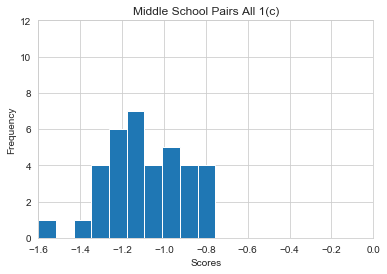

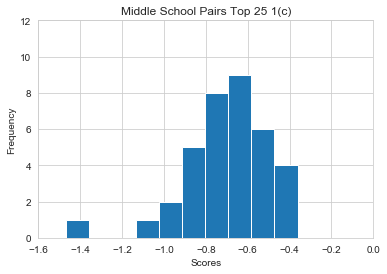

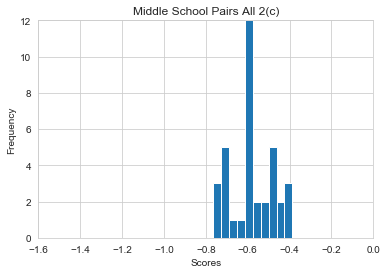

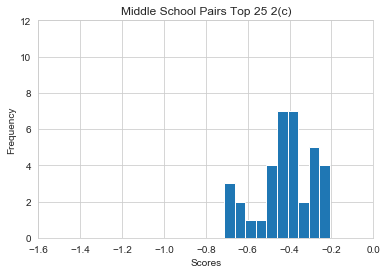

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.hist(global_1c)
plt.ylim([0,12])
plt.xlim([-1.6, 0])
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Middle School Pairs All 1(c)')
plt.show()

plt.hist(top_1c)
plt.ylim([0,12])
plt.xlim([-1.6, 0])
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Middle School Pairs Top 25 1(c)')
plt.show()

plt.hist(global_2c)
plt.ylim([0,12])
plt.xlim([-1.6, 0])
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Middle School Pairs All 2(c)')
plt.show()

plt.hist(top_2c)
plt.ylim([0,12])
plt.xlim([-1.6, 0])
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Middle School Pairs Top 25 2(c)')
plt.show()

## entr1c

In [21]:
entr = {'all1c':global_1c, 'top251c':top_1c, 'all2c': global_2c, 'top252c': top_2c}
entr_df = pd.DataFrame(entr)
entr_df.describe()


entr_df.to_pickle('Middle_School/entr', )


In [79]:
df_ug_entr = pd.read_pickle("Undergrad/entr")
df_ug_entr.drop(columns=['group'], inplace=True)
df_ug_group_word_unique = [556, 460, 370, 410, 217, 450, 507, 350, 337, 570, 379, 629, 516, 606, 270]
print(df_ug_entr.info())
print(entr_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entr_1c_all  15 non-null     float64
 1   entr_2c_all  15 non-null     float64
 2   entr_1c_25   15 non-null     float64
 3   entr_2c_25   15 non-null     float64
dtypes: float64(4)
memory usage: 600.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   all1c    36 non-null     float64
 1   top251c  36 non-null     float64
 2   all2c    36 non-null     float64
 3   top252c  36 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB
None


In [86]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(entr_df['all1c'], df_ug_entr['entr_1c_all']))
print(mannwhitneyu(entr_df['all2c'], df_ug_entr['entr_2c_all']))
print(mannwhitneyu(entr_df['top251c'], df_ug_entr['entr_1c_25']))
print(mannwhitneyu(entr_df['top252c'], df_ug_entr['entr_2c_25']))
# print(sum(entr['all2c'])/len(entr['all2c']))
# print(ttest_ind(entr_df, df_ug_entr))
# print(ttest_ind(entr_df, df_ug_entr, equal_var=False))
# print(ttest_ind(unique_by_group, df_ug_group_word_unique))
# print(ttest_ind(unique_by_group, df_ug_group_word_unique, equal_var=False))

MannwhitneyuResult(statistic=225.0, pvalue=0.17880616450069253)
MannwhitneyuResult(statistic=131.0, pvalue=0.00209735817115814)
MannwhitneyuResult(statistic=227.0, pvalue=0.18981469275794255)
MannwhitneyuResult(statistic=246.0, pvalue=0.3135457322450721)


307.75
565
113
91.65661849689695
316.0


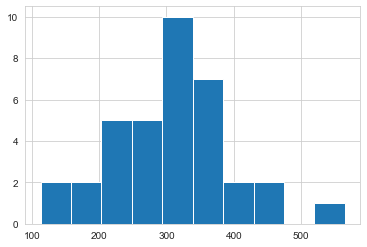

In [25]:
import statistics

plt.hist(unique_by_group)
print(sum(unique_by_group)/len(unique_by_group))
print(max(unique_by_group))
print(min(unique_by_group))
print(statistics.stdev(unique_by_group))
print(statistics.median(unique_by_group))

441.8
629
217
122.8263582693645
450


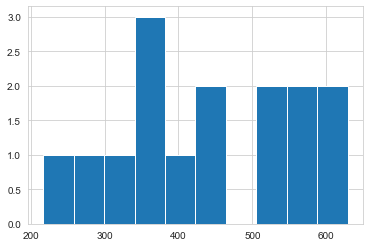

In [26]:
plt.hist(df_ug_group_word_unique)
print(sum(df_ug_group_word_unique)/len(df_ug_group_word_unique))
print(max(df_ug_group_word_unique))
print(min(df_ug_group_word_unique))
print(statistics.stdev(df_ug_group_word_unique))
print(statistics.median(df_ug_group_word_unique))


In [27]:
print(entr_df[:0])
print(statistics.median(entr_df['all1c']))
print(statistics.median(entr_df['top251c']))
print(statistics.median(entr_df['all2c']))
print(statistics.median(entr_df['top252c']))
# print(statistics.median(df_ug_entr[0]))

Empty DataFrame
Columns: [all1c, top251c, all2c, top252c]
Index: []
-1.1222722813635624
-0.6594153355308308
-0.5928176059742138
-0.4101205348562642


In [28]:
# group1shuffle=random.sample(range(0,36),36)
# group2shuffle=random.sample(range(0,36),36)
# Saving the previous shuffle
group1shuffle=[17, 5, 11, 4, 30, 33, 35, 18, 14, 0, 25, 1, 26, 24, 23, 9, 10, 6, 29, 31, 8, 32, 19, 2, 13, 7, 20, 21, 16, 3, 15, 12, 34, 22, 27, 28]
group2shuffle=[5, 12, 21, 26, 27, 29, 10, 6, 17, 2, 23, 18, 15, 11, 0, 34, 19, 1, 28, 4, 22, 20, 33, 7, 24, 35, 3, 14, 9, 25, 16, 30, 8, 13, 31, 32]

In [29]:
print(group1shuffle)
print(group2shuffle)

[17, 5, 11, 4, 30, 33, 35, 18, 14, 0, 25, 1, 26, 24, 23, 9, 10, 6, 29, 31, 8, 32, 19, 2, 13, 7, 20, 21, 16, 3, 15, 12, 34, 22, 27, 28]
[5, 12, 21, 26, 27, 29, 10, 6, 17, 2, 23, 18, 15, 11, 0, 34, 19, 1, 28, 4, 22, 20, 33, 7, 24, 35, 3, 14, 9, 25, 16, 30, 8, 13, 31, 32]


In [30]:
# groups = unique list of groups
global_alignment_baseline = {}

In [32]:
for i in range(0,36):
    global_alignment_baseline[i] = {}
    # get speakers
    group1 = groups[group1shuffle[i]]
    group2 = groups[group2shuffle[i]]
    speaker1 = speaker_freq[group1]['S1']
    speaker2 = speaker_freq[group2]['S2']
    # count of all words used by speakers
    all_s1 = sum(speaker1.values())
    all_s2 = sum(speaker2.values())
    # do math
    # list to hold entr(w) values
    entr_w = []
    entr_2c_top = []
    entr_2c_bottom = []
    group_counter = Counter(speaker1) + Counter(speaker2)
    group_dict = dict(group_counter)
    # print(group_dict.keys())
    for w in group_dict.keys():
        wc1= 0
        if w in speaker1.keys():
            # value of word for speaker 1
            wc1 = speaker1[w]
        # speaker 1 value
        s1_w = wc1/all_s1
        # value of word for speaker 2
        wc2 = 0
        if w in speaker2.keys():
            wc2 = speaker2[w]
        s2_w = wc2/all_s2
        entr_w.append(-(abs(s1_w-s2_w)))
        entr_2c_top.append(abs(wc1-wc2))
        entr_2c_bottom.append(wc1+wc2)
    global_alignment_baseline[i]['entr_1c'] = sum(entr_w)
    global_alignment_baseline[i]['entr_2c'] = -(sum(entr_2c_top)/sum(entr_2c_bottom))
    print(group1, ",", group2, ",", sum(entr_w), ",", -(sum(entr_2c_top)/sum(entr_2c_bottom)))

print(global_alignment_baseline)

Dec4-2019 - t012 t065.xlsx , Dec11-2019 - t060 t105.xlsx , -1.380144404332133 , -0.670020120724346
Dec11-2019 - t060 t105.xlsx , Dec4-2019 - t007 t091.xlsx , -1.4634367474146452 , -0.7304964539007093
Dec4-2019 - t099 t107.xlsx , Feb2019_G29.xlsx , -1.3898496170891448 , -0.7293428757319453
Dec4-2019 - t040 t085.xlsx , Feb2019_G25.xlsx , -1.348650970957213 , -0.6594427244582043
Dec2018_G20.xlsx , Dec2018_G9.xlsx , -1.1435408318753888 , -0.5915032679738562
Dec11-2019 - t022 t075.xlsx , Feb2019_G26.xlsx , -1.5761715761715709 , -0.8609975470155355
Dec2018_G1.xlsx , Dec11-2019 - t007 t091.xlsx , -1.3748983975398992 , -0.7046662728883638
Dec2018_G14.xlsx , Feb2019_G18.xlsx , -1.1864585955197684 , -0.6960431654676259
Dec2018_G22.xlsx , Dec4-2019 - t012 t065.xlsx , -1.3853244116569592 , -0.693069306930693
Feb2019_G02.xlsx , Feb2019_G43.xlsx , -1.0370302742577493 , -0.5347368421052632
Feb2019_G05.xlsx , Dec2018_G15.xlsx , -1.273857721226139 , -0.7062374245472837
Dec11-2019 - t040 t085.xlsx , Dec

In [33]:
global_alignment_25_baseline = {}

for i in range(0,36):
    global_alignment_25_baseline[i] = {}
    group1 = groups[group1shuffle[i]]
    group2 = groups[group2shuffle[i]]
    speaker1 = speaker_freq[group1]['S1']
    speaker2 = speaker_freq[group2]['S2']
    group_dict = Counter(speaker1) + Counter(speaker2)
    top_25 = list(group_dict.most_common(25))
    # print(len(top_25))
    # count of all words used by speakers
    entr_w = []
    entr_2c_top = []
    entr_2c_bottom = []
    # top_25 = []
    # for i in range(0,25):
    #     sort = sorted(((v,k) for k,v in group_freq[g].items()), reverse=True)
    #     top_25.append(sort[i][1])
    # do math
    all_s1_li = []
    for j in top_25:
        # (print(i[0]))
        if j[0] in speaker1:
            all_s1_li.append(speaker1[j[0]])
    all_s1 = sum(all_s1_li)
    all_s2_li = []
    for j in top_25:
        if j[0] in speaker2:
            all_s2_li.append(speaker2[j[0]])
    all_s2 = sum(all_s2_li)
    for j in top_25:
        wc1 = 0
        if j[0] in speaker1.keys():
            wc1 = speaker1[j[0]]
        # speaker 1 value
        s1_w = wc1/all_s1
        # value of word for speaker 2
        wc2 = 0
        if j[0] in speaker2.keys():
            wc2 = speaker2[j[0]]
        s2_w = wc2/all_s2
        entr_w.append(-(abs(s1_w-s2_w)))
        entr_2c_top.append(abs(wc1-wc2))
        entr_2c_bottom.append(wc1+wc2)
    global_alignment_25_baseline[i]['entr_1c'] = sum(entr_w)
    global_alignment_25_baseline[i]['entr_2c'] = -(sum(entr_2c_top)/sum(entr_2c_bottom))
    print(group1, ",", group2, ",", sum(entr_w), ",", -(sum(entr_2c_top)/sum(entr_2c_bottom)))

print(global_alignment_25_baseline)


Dec4-2019 - t012 t065.xlsx , Dec11-2019 - t060 t105.xlsx , -0.9416666666666667 , -0.44696969696969696
Dec11-2019 - t060 t105.xlsx , Dec4-2019 - t007 t091.xlsx , -1.1226437795780861 , -0.5701754385964912
Dec4-2019 - t099 t107.xlsx , Feb2019_G29.xlsx , -0.9479883581578497 , -0.6339285714285714
Dec4-2019 - t040 t085.xlsx , Feb2019_G25.xlsx , -0.973875290066622 , -0.4527363184079602
Dec2018_G20.xlsx , Dec2018_G9.xlsx , -0.8413793103448275 , -0.43573667711598746
Dec11-2019 - t022 t075.xlsx , Feb2019_G26.xlsx , -1.2725294858582386 , -0.8244111349036403
Dec2018_G1.xlsx , Dec11-2019 - t007 t091.xlsx , -0.9587619801283742 , -0.5064194008559201
Dec2018_G14.xlsx , Feb2019_G18.xlsx , -0.6154934823091249 , -0.5
Dec2018_G22.xlsx , Dec4-2019 - t012 t065.xlsx , -1.02813752698119 , -0.5278969957081545
Feb2019_G02.xlsx , Feb2019_G43.xlsx , -0.616724336793541 , -0.34328358208955223
Feb2019_G05.xlsx , Dec2018_G15.xlsx , -0.8481864040355512 , -0.5765199161425576
Dec11-2019 - t040 t085.xlsx , Dec2018_G14.xl

In [ ]:
global_1c_base = []
global_2c_base = []
top_1c_base = []
top_2c_base = []

for i in range(0,36):
    print(i)
    print('all words entr1c:', global_alignment_baseline[i]['entr_1c'])
    global_1c_base.append(global_alignment_baseline[i]['entr_1c'])
    print('top 25 words entr1c:', global_alignment_25_baseline[i]['entr_1c'])
    top_1c_base.append(global_alignment_25_baseline[i]['entr_1c'])
    print('all words entr2c:', global_alignment_baseline[i]['entr_2c'])
    global_2c_base.append(global_alignment_baseline[i]['entr_2c'])
    print('top 25 words entr2c:', global_alignment_25_baseline[i]['entr_2c'])
    top_2c_base.append(global_alignment_25_baseline[i]['entr_2c'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.hist(global_1c_base)
plt.title('Global 1(c)')
plt.show()
plt.hist(top_1c_base)
plt.title('Top 1(c)')
plt.show()
plt.hist(global_2c_base)
plt.title('Global 2(c)')
plt.show()
plt.hist(top_2c_base)
plt.title('Top 2(c)')
plt.show()

In [ ]:
entr_base = {'all1c':global_1c_base, 'top251c':top_1c_base, 'all2c': global_2c_base, 'top252c': top_2c_base}
entr_df_base = pd.DataFrame(entr_base)
entr_df_base.describe()

In [ ]:
for i in sorted(groups):
    print(i)

print(len(groups))

In [ ]:
from scipy.stats import ttest_ind
# print(sum(entr['all2c'])/len(entr['all2c']))
print(ttest_ind(entr_df, entr_df_base))
print(ttest_ind(entr_df, entr_df_base, equal_var=False))

In [46]:
orig = pd.read_csv('Original_Scores.csv', sep=',', header=None)
base = pd.read_csv('Baseline_Scores.csv', sep=',', header=None)

from scipy.stats import ttest_rel
print(ttest_rel(orig[0], base[0]))
print(ttest_rel(orig[1], base[1]))
print(ttest_rel(orig[2], base[2]))
print(ttest_rel(orig[3], base[3]))

Ttest_relResult(statistic=11.155079991302642, pvalue=4.2479486149632064e-17)
Ttest_relResult(statistic=3.171543575909581, pvalue=0.0022632342653586893)
Ttest_relResult(statistic=9.802222537145203, pvalue=1.056064592486445e-14)
Ttest_relResult(statistic=7.104404488333645, pvalue=8.601732855806657e-10)


In [61]:
from scipy import stats
print(stats.wilcoxon(orig[0], base[0], alternative='greater'))
print(stats.wilcoxon(orig[1], base[1], alternative='greater'))
print(stats.wilcoxon(orig[2], base[2], alternative='greater'))
print(stats.wilcoxon(orig[3], base[3], alternative='greater'))

WilcoxonResult(statistic=2406.0, pvalue=4.913479453988451e-12)
WilcoxonResult(statistic=1955.0, pvalue=1.525137327580763e-05)
WilcoxonResult(statistic=2349.0, pvalue=4.7268001929942344e-11)
WilcoxonResult(statistic=2194.0, pvalue=1.2858013404704076e-08)
